# Datalab NOAA weather example.
this notebook uses data lab to look at an anomaly in the records for the weather stations in Washington state.

## This must be run in Datalab.

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline  

### look for the hotest spots in washington state.

In [140]:
%%sql
SELECT
  max, (max-32)*5/9 celsius, mo, da, state, stn, name
FROM (
  SELECT
    max, mo, da, state, stn, name
  FROM
    [bigquery-public-data:noaa_gsod.gsod2015] a
  JOIN
    [bigquery-public-data:noaa_gsod.stations] b
  ON
    a.stn=b.usaf
    AND a.wban=b.wban
  WHERE
    state="WA"
    AND max<1000
    AND country='US' )
ORDER BY
  max DESC

max,celsius,mo,da,state,stn,name
113.0,45.0,06,29,WA,727846,WALLA WALLA RGNL
113.0,45.0,06,28,WA,727846,WALLA WALLA RGNL
111.9,44.3888888889,06,28,WA,727827,MOSES LAKE/GRANT CO
111.9,44.3888888889,06,29,WA,727827,MOSES LAKE/GRANT CO
111.2,44.0,09,24,WA,720272,SKAGIT RGNL
111.2,44.0,09,25,WA,720272,SKAGIT RGNL
111.0,43.8888888889,06,29,WA,727845,TRI CITIES
111.0,43.8888888889,06,28,WA,727845,TRI CITIES
111.0,43.8888888889,06,27,WA,727845,TRI CITIES
109.9,43.2777777778,06,28,WA,727890,OMAK


Skagit Rgnl is in a very cool costal community.   this is an anomaly.  let's  look at two other nearby stations.

In [154]:
%%sql
SELECT
  usaf, name
FROM [bigquery-public-data:noaa_gsod.stations] 
WHERE
    name="BELLINGHAM INTL" OR name="PADILLA BAY RESERVE" OR name = "SKAGIT RGNL"


usaf,name
720272,SKAGIT RGNL
998007,PADILLA BAY RESERVE
720272,SKAGIT RGNL
727976,BELLINGHAM INTL


Now pull out the weather data for  the year for all three stations and plot them.

In [147]:
q = "SELECT max AS temperature, \
       TIMESTAMP(STRING(year) + '-' + STRING(mo) + '-' + STRING(da)) AS timestamp \
FROM [bigquery-public-data:noaa_gsod.gsod2015] \
WHERE stn = '%s' and max <500 \
ORDER BY year DESC, mo DESC, da DESC"


In [148]:
stationlist = ['720272','727930', '727976' ]
dflist = [bq.Query(q % station).to_dataframe() for station in stationlist]

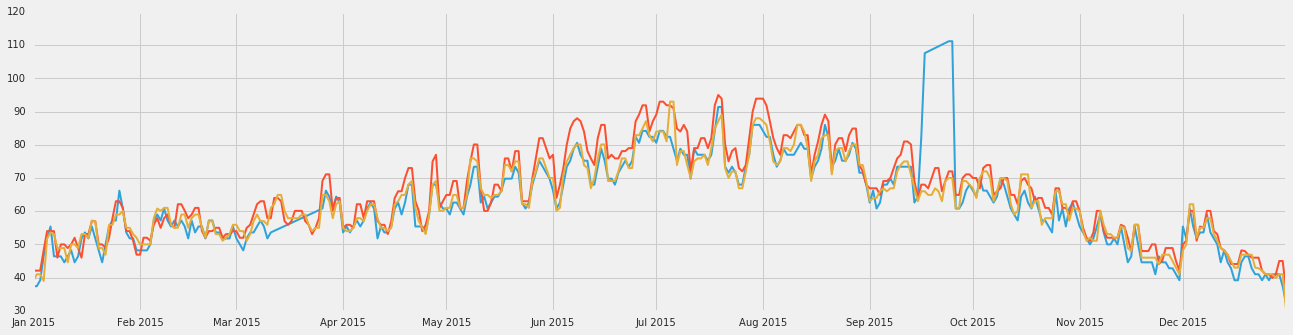

In [151]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
with plot.style.context('fivethirtyeight'):
  for df in dflist:
    plot.plot(df['timestamp'], df['temperature'], linewidth=2)
plot.show()  

we can clearly see the skagit station is not always functioning properly.  there is clearly another anomaly in March.